In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import os
import zipfile as zf
import cv2
import imghdr

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

2022-12-16 17:15:13.418382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Loading the Data

The images were downloaded from google using one of Google Chrome's extensions, `Download All Images`. It simply allows the user to save all images of the search results into a zip file where we will unzip to access them.

In [2]:
happy_files = zf.ZipFile("../data/happy.zip", 'r')
happy_files.extractall('../data/happy')
happy_files.close()

In [3]:
sad_files = zf.ZipFile("../data/sad.zip", 'r')
sad_files.extractall('../data/sad')
sad_files.close()

In [4]:
# deleting files that are under 9kb as they seem to be non-functional
for root, _, files in os.walk('data'):
    for f in files:
        fullpath = os.path.join(root, f)
        if os.path.getsize(fullpath) < 10 * 1024:
            os.remove(fullpath)

In [5]:
data_dir = '../data'

In [6]:
# allows iteration through all images in the alert folder
os.listdir(os.path.join(data_dir, 'happy'))

['iStock_000015424718Small.jpg',
 'images26.jpg',
 'maxresdefault4.jpg',
 '95-Quotes-On-Being-Happy-With-Where-You-Are-in-Life.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'happy.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'happyball.jpg',
 'p-1-90703664-dont-try-to-be-happy-focus-on-these-5-things-instead.jpg',
 'What-Happy-Are-You.jpg',
 'How-To-Be-Happy-A-Guide.jpg',
 'smilelogo-yellow.png',
 '192px.svg',
 '1644341988702.jpg',
 'maxresdefault5.jpg',
 'image18.jpeg',
 'images25.jpg',
 'images19.jpg',
 'getty_459097117_89221.jpg',
 'images18.jpg',
 'images24.jpg',
 'maxresdefault6.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'maxresdefault2.jpg',
 'images20.jpg',
 'ss_decfb595df67b0f2804f17eccb19cf2d77db9ea8.1920x1080.jpg',
 'TELEMMGLPICT000169013857_trans_NvBQzQNjv4Bqp9c5WVj0Jr0gvyuux5WeKI-QD44-voN49g7o0Fjx2T4.jpeg',
 'How-to-Be-Happy_600x877-pinterest.jpg',
 'iStock-1207566766.jpg',
 'happy-man.jpg',
 'images21.jpg',
 'maxresdefault3.jpg',
 'images35.jpg',
 'vector.sv

In [7]:
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
img = cv2.imread(os.path.join('../data','happy', '_120731663_gettyimages-1057610362.jpg'))

In [9]:
img.shape

(549, 976, 3)

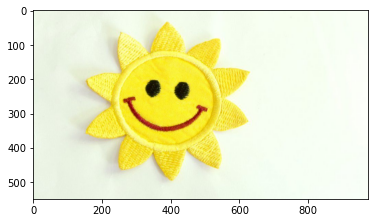

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
for image_class in os.listdir(data_dir):
    if image_class.startswith('.') or image_class == 'sad.zip' or image_class == 'happy.zip' or image_class == 'happytest.jpg':
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list ../data/happy/p-1-90703664-dont-try-to-be-happy-focus-on-these-5-things-instead.jpg
Image not in ext list ../data/happy/192px.svg
Image not in ext list ../data/happy/vector.svg
Image not in ext list ../data/happy/vector9.svg
Image not in ext list ../data/happy/vector8.svg
Image not in ext list ../data/happy/vector3.svg
Image not in ext list ../data/happy/vector2.svg
Image not in ext list ../data/happy/vector6.svg
Image not in ext list ../data/happy/vector7.svg
Image not in ext list ../data/happy/vector5.svg
Image not in ext list ../data/happy/vector4.svg
Image not in ext list ../data/happy/vector16.svg
Issue with image ../data/happy/.ipynb_checkpoints
Image not in ext list ../data/happy/happy-blij.gif
Image not in ext list ../data/happy/vector15.svg
Image not in ext list ../data/happy/vector14.svg
Image not in ext list ../data/happy/vector10.svg
Image not in ext list ../data/happy/vector11.svg
Image not in ext list ../data/happy/vector13.svg
Image not in ext list 

libpng warning: iCCP: known incorrect sRGB profile


Image not in ext list ../data/sad/1DvV_sCibWNUf9lvcOMR4bw.jpeg
Image not in ext list ../data/sad/vector4.svg
Issue with image ../data/sad/.ipynb_checkpoints
Image not in ext list ../data/sad/LightTherapySAD-166828091-770x533-1-650x428.jpg
Image not in ext list ../data/sad/side-view-young-woman-looking-260nw-1196187574.jpg
Image not in ext list ../data/sad/vector10.svg
Image not in ext list ../data/sad/vector11.svg
Image not in ext list ../data/sad/vector13.svg
Image not in ext list ../data/sad/vector12.svg


In [12]:
data = tf.keras.utils.image_dataset_from_directory('../data')

Found 300 files belonging to 2 classes.


2022-12-16 17:15:38.826058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

2022-12-16 17:15:41.065225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [15]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
# Class 0 == Happy
# Class 1 == Sad
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

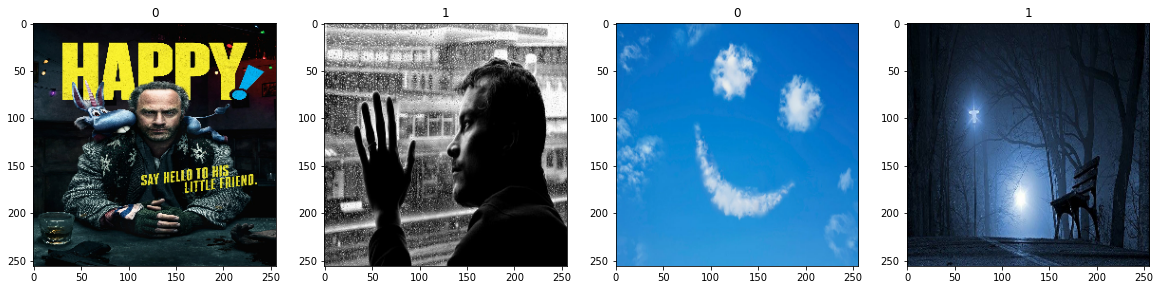

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocessing Data

In [18]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [19]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [20]:
print(scaled_iterator.next()[0].max())
print(scaled_iterator.next()[0].min())

2022-12-16 17:15:46.829502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1.0
0.0


In [21]:
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1)

In [22]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

## 3. Deep Learning

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(filters = 16, 
                 kernel_size = (3,3), 
                 strides = 1,
                 activation='relu',
                 input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 strides = 1,
                 activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 16, 
                 kernel_size = (3,3), 
                 strides = 1,
                 activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam',
              loss = 'bce',
              metrics = ['acc'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 4. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, 
                 epochs=20, 
                 validation_data = val, 
                 callbacks=[tensorboard_callback])

Epoch 1/20


2022-12-16 17:15:53.150778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.6728 - acc: 0.6696

2022-12-16 17:16:02.984985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.6728 - acc: 0.6696 - val_loss: 0.5836 - val_acc: 0.6562
Epoch 2/20


2022-12-16 17:16:08.664819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.5127 - acc: 0.7902

2022-12-16 17:16:17.974954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 15s 2s/step - loss: 0.5127 - acc: 0.7902 - val_loss: 0.4092 - val_acc: 0.8438
Epoch 3/20


2022-12-16 17:16:23.549621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.4426 - acc: 0.8170

2022-12-16 17:16:33.124787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 15s 2s/step - loss: 0.4426 - acc: 0.8170 - val_loss: 0.3845 - val_acc: 0.8438
Epoch 4/20


2022-12-16 17:16:38.868021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3510 - acc: 0.8616

2022-12-16 17:16:49.045695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.3510 - acc: 0.8616 - val_loss: 0.2995 - val_acc: 0.8750
Epoch 5/20


2022-12-16 17:16:54.696371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3055 - acc: 0.8527

2022-12-16 17:17:04.906423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.3055 - acc: 0.8527 - val_loss: 0.3114 - val_acc: 0.8594
Epoch 6/20


2022-12-16 17:17:10.585026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.2918 - acc: 0.8884

2022-12-16 17:17:21.035089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.2918 - acc: 0.8884 - val_loss: 0.1943 - val_acc: 0.9844
Epoch 7/20


2022-12-16 17:17:26.717316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.2184 - acc: 0.9330

2022-12-16 17:17:37.350276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.2184 - acc: 0.9330 - val_loss: 0.1095 - val_acc: 0.9844
Epoch 8/20


2022-12-16 17:17:43.048236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1598 - acc: 0.9509

2022-12-16 17:17:53.557625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 16s 2s/step - loss: 0.1598 - acc: 0.9509 - val_loss: 0.1248 - val_acc: 0.9844
Epoch 9/20


2022-12-16 17:17:59.271746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0984 - acc: 0.9688

2022-12-16 17:18:10.337812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0984 - acc: 0.9688 - val_loss: 0.0937 - val_acc: 0.9531
Epoch 10/20


2022-12-16 17:18:16.064745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0949 - acc: 0.9554

2022-12-16 17:18:26.894358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0949 - acc: 0.9554 - val_loss: 0.0482 - val_acc: 1.0000
Epoch 11/20


2022-12-16 17:18:32.641863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0510 - acc: 0.9955

2022-12-16 17:18:43.480302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0510 - acc: 0.9955 - val_loss: 0.0414 - val_acc: 0.9844
Epoch 12/20


2022-12-16 17:18:49.571160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0447 - acc: 0.9911

2022-12-16 17:19:00.401965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0447 - acc: 0.9911 - val_loss: 0.0183 - val_acc: 1.0000
Epoch 13/20


2022-12-16 17:19:06.186607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0146 - acc: 0.9955

2022-12-16 17:19:17.045560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0146 - acc: 0.9955 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 14/20


2022-12-16 17:19:23.336532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0426 - acc: 0.9911

2022-12-16 17:19:35.290923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 18s 2s/step - loss: 0.0426 - acc: 0.9911 - val_loss: 0.0558 - val_acc: 0.9844
Epoch 15/20


2022-12-16 17:19:41.166584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0305 - acc: 0.9911

2022-12-16 17:19:52.145090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0305 - acc: 0.9911 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 16/20


2022-12-16 17:19:57.909289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0248 - acc: 0.9866

2022-12-16 17:20:09.009083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0248 - acc: 0.9866 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 17/20


2022-12-16 17:20:14.883838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0292 - acc: 0.9911

2022-12-16 17:20:25.917366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.0537 - val_acc: 0.9844
Epoch 18/20


2022-12-16 17:20:31.761339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0290 - acc: 0.9955

2022-12-16 17:20:42.855870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0290 - acc: 0.9955 - val_loss: 0.0306 - val_acc: 0.9844
Epoch 19/20


2022-12-16 17:20:48.702953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0146 - acc: 0.9955

2022-12-16 17:20:59.870417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0146 - acc: 0.9955 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 20/20


2022-12-16 17:21:05.600712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0248 - acc: 0.9955

2022-12-16 17:21:16.591223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 17s 2s/step - loss: 0.0248 - acc: 0.9955 - val_loss: 0.0123 - val_acc: 1.0000


In [30]:
hist.history

{'loss': [0.6727996468544006,
  0.5126924514770508,
  0.44262436032295227,
  0.3510478436946869,
  0.30553847551345825,
  0.29181256890296936,
  0.21837981045246124,
  0.1598266214132309,
  0.09839671105146408,
  0.09494901448488235,
  0.051006805151700974,
  0.0446740947663784,
  0.01456493977457285,
  0.042615145444869995,
  0.030454279854893684,
  0.024813828989863396,
  0.02920946478843689,
  0.02904372848570347,
  0.014642702415585518,
  0.024812165647745132],
 'acc': [0.6696428656578064,
  0.7901785969734192,
  0.8169642686843872,
  0.8616071343421936,
  0.8526785969734192,
  0.8883928656578064,
  0.9330357313156128,
  0.9508928656578064,
  0.96875,
  0.9553571343421936,
  0.9955357313156128,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  0.9910714030265808,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'val_loss': [0.5835678577423096,
  0.40920740365982056,
  0.3845413327217102,
  0.2994837462

## Plots

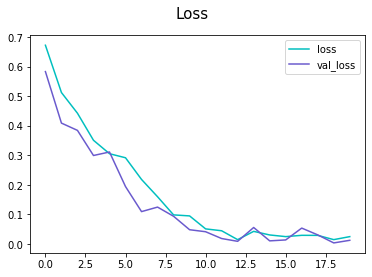

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], 
         color = 'c',
         label = 'loss')
plt.plot(hist.history['val_loss'],
        color='slateblue',
        label = 'val_loss')
fig.suptitle('Loss', fontsize = 15)
plt.legend()
plt.show();

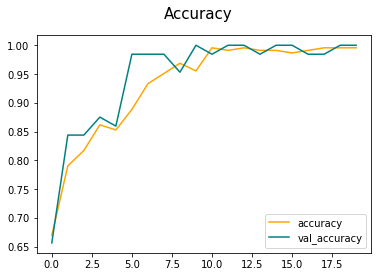

In [32]:
fig = plt.figure()
plt.plot(hist.history['acc'], 
         color = 'orange',
         label = 'accuracy')
plt.plot(hist.history['val_acc'],
        color='teal',
        label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend()
plt.show();

## Evaluating Performance

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2022-12-16 17:21:23.562582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 250ms/step


In [35]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


At this point, I want to make sure that the model will perform just as well on new data. I saved a 'happy' image further down the google search to ensure that the new picture is not part of our original data.

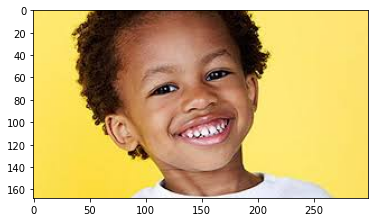

In [36]:
img = cv2.imread('../happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

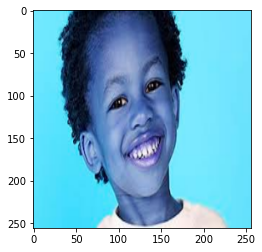

In [37]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [40]:
yhat

array([[0.00327008]], dtype=float32)

In [41]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
    
if yhat < 0.5:
    print(f'Predicted class is Happy')

Predicted class is Happy


And the test is a success! It correctly labeled our new picture as a happy photo.

## Saving the Model

I'm saving the model into a models foler in case I want to revisit and create a more sophisticated model with more layers to improve accuracy.

In [42]:
model.save(os.path.join('../models', 'happysadmodel.h5'))

In [43]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [44]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 90ms/step


In [45]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
    
if yhat_new < 0.5:
    print(f'Predicted class is Happy')

Predicted class is Happy
